<a href="https://colab.research.google.com/github/AminFathollahi/NMA_DL/blob/main/tutorials/W2D2_NeuroSymbolicMethods/student/W2D2_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Basic operations of vector symbolic algebra

**Week 2, Day 2: Neuro-Symbolic Methods**

**By Neuromatch Academy**

__Content creators:__ P. Michael Furlong, Chris Eliasmith

__Content reviewers:__ Hlib Solodzhuk, Patrick Mineault, Aakash Agrawal, Alish Dipani, Hossein Rezaei, Yousef Ghanbari, Mostafa Abdollahi, Alex Murphy

__Production editors:__ Konstantine Tsafatinos, Ella Batty, Spiros Chavlis, Samuele Bolotta, Hlib Solodzhuk, Alex Murphy


___


# Tutorial Objectives

*Estimated timing of tutorial: 1 hour*

In this tutorial we will introduce the concept of a vector symbolic algebra (VSA) and discuss its main operations and we will give you some demonstrations on a simple set of concepts (shapes and their colors) in order to let you see and play around with concept manipulations in this VSA! Let's get started!

In [ ]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today

from IPython.display import IFrame
link_id = "jybuw"

print(f"If you want to download the slides: 'https://osf.io/download/{link_id}'")

IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{link_id}/?direct%26mode=render", width=854, height=480)

---
# Setup (Colab Users: Please Read)

Note that because this tutorial relies on some special Python packages, these packages have requirements for specific versions of common scientific libraries, such as `numpy`. If you're in Google Colab, then as of May 2025, this comes with a later version (2.0.2) pre-installed. We require an older version (we'll be installing `1.24.4`). This causes Colab to force a session restart and then re-running of the installation cells for the new version to take effect. When you run the cell below, you will be prompted to restart the session. This is *entirely expected* and you haven't done anything wrong. Simply click 'Restart' and then run the cells as normal.

An additional error might sometimes arise where an exception is raised connected to a missing element of NumPy. If this occurs, please restart the session and re-run the cells as normal and this error will go away. Updated versions of the affected libraries are expected out soon, but sadly not in time for the preparation of this material. We thank you for your understanding.

In [1]:
# @title Install and import feedback gadget

!pip install git+https://github.com/neuromatch/sspspace@neuromatch --quiet
!pip install numpy==1.24.4
!pip install nengo_spa==2.0.0
!pip install --quiet matplotlib ipywidgets scipy vibecheck

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "neuromatch_neuroai",
            "user_key": "wb2cxze8",
        },
    ).render()


feedback_prefix = "W2D2_T1"

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 90.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.6.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.3/542.3 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.4 MB/s eta 0:00:00


In [1]:
# @title Imports

#working with data
import numpy as np

#plotting
import matplotlib.pyplot as plt
import logging

#interactive display
import ipywidgets as widgets

#modeling
import sspspace
import nengo_spa as spa
from scipy.special import softmax

In [2]:
# @title Figure settings

logging.getLogger('matplotlib.font_manager').disabled = True

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # perfrom high definition rendering for images and plots
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [3]:
# @title Plotting functions

def plot_vectors(concepts, labels, shape = (32, 32)):
    """
    Plot vector symbols associated with the given concepts.

    Inputs:
    - concepts (list of sspspace.ssp.SSP): list of concepts which contain associated vectors.
    - labels (list of str): list of strings which represent concepts.
    - shape (tuple, default = (32, 32)): desired image shape.
    """
    with plt.xkcd():
        n = len(concepts)
        for i in range(len(concepts)):
            plt.subplot(1,n,i+1)
            plt.imshow(concepts[i].view(dtype=float,type=np.ndarray).reshape(shape), cmap='Greys')
            plt.xticks([])
            plt.yticks([])
            plt.title(labels[i])

def plot_similarity_matrix(sim_mat, labels, values = False):
    """
    Plot the similarity matrix between vectors.

    Inputs:
    - sim_mat (numpy.ndarray): similarity matrix between vectors.
    - labels (list of str): list of strings which represent concepts.
    - values (bool): True if we would like to plot values of similarity too.
    """
    with plt.xkcd():
        plt.imshow(sim_mat, cmap='Greys')
        plt.colorbar()
        plt.xticks(np.arange(len(labels)), labels, rotation=45, ha="right", rotation_mode="anchor")
        plt.yticks(np.arange(len(labels)), labels)
        if values:
            for x in range(sim_mat.shape[1]):
                for y in range(sim_mat.shape[0]):
                    plt.text(x, y, f"{sim_mat[y, x]:.2f}", fontsize = 8, ha="center", va="center", color="green")
        plt.title('Similarity between vector-symbols')
        plt.xlabel('Symbols')
        plt.ylabel('Symbols')
        plt.show()

def plot_line_similarity_matrix(sim_mat, xaxis_ticks, multiple_objects = True, labels = None, title = "Awesome title!"):
    """
    Plot similarirty matrix (or vector if multiple_objects is False) as lines.

    Inputs:
    - sim_mat (numpy.ndarray): similarity matrix between vectors.
    - xaxis_ticks (list): list of ticks to put in x-axis.
    - multiple_objects (bool, default = True): True if there are a couple of objects to plot similarity.
    - labels (list, default = None): labels to plot.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        if multiple_objects:
            for idx, integer_sims in enumerate(sim_mat):
                if labels:
                    plt.plot(xaxis_ticks, integer_sims.flatten(), label=f'$\phi$[{idx+1}]', marker='o', ls='--')
                else:
                    plt.plot(xaxis_ticks, integer_sims.flatten(), marker='o', ls='--')
        else:
            plt.plot(xaxis_ticks,sim_mat.flatten(), ls='--',marker='o')

    plt.ylabel('Similarity')
    plt.xlabel('n')
    plt.xticks(xaxis_ticks)
    if labels:
        plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

def plot_double_line_similarity_matrix(sim_mat, xaxis_ticks, labels, title):
    """
    Plot similarirty matrix (or vector if multiple_objects is False) as lines for two different matrices.

    Inputs:
    - sim_mat (numpy.ndarray): list of similarity matrix between vectors.
    - xaxis_ticks (list): list of ticks to put in x-axis.
    - multiple_objects (bool, default = True): True if there are a couple of objects to plot similarity.
    - labels (list): labels to plot.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        plt.plot(xaxis_ticks,sim_mat[0].flatten(), ls='--',marker='o', label = labels[0])
        plt.plot(xaxis_ticks,sim_mat[1].flatten(), ls='--',marker='o', label = labels[1])
    plt.ylabel('Similarity')
    plt.xlabel('n')
    plt.xticks(xaxis_ticks)
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

def plot_real_valued_line_similarity(sim_mat, x_range, title):
    """
    Inputs:
    - sim_mat (numpy.ndarray): similarity matrix between vectors.
    - x_range (numpy.ndarray): x-axis range.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        plt.plot(x_range, sims)
    plt.xlabel('x')
    plt.ylabel('Similarity')
    plt.title(title)

In [4]:
# @title Set random seed

import random
import numpy as np

def set_seed(seed=None):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)

set_seed(seed = 42)

---

# Section 1: High-dimensional vector symbols

In this section, we are going to start our journey by representing concepts as high-dimensional vectors.

In [ ]:
# @title Video 1: Similarity

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'D9VzF9AyDic'), ('Bilibili', 'BV17x4y1b7ED')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_high_dimensional_vector_symbols")

## Coding Exercise 1: Concepts as High-Dimensional Vectors

In an arbitrary space of concepts, we will represent the ideas of `CIRCLE`, `SQUARE` and `TRIANGLE`. For that, we will make a vocabulary that map identifiers of the concepts (strings of their names in this case) into high-dimensional vectors of unit length. It means that for each `name`, we will uniquely identify $\mathbf{v}$ where $||\mathbf{v}|| = 1$.

In this exercise, check that, indeed, vectors are of unit length.

In [5]:
from nengo_spa.algebras.hrr_algebra import HrrProperties, HrrAlgebra
from nengo_spa.vector_generation import VectorsWithProperties
def make_vocabulary(vector_length):
    vec_generator = VectorsWithProperties(vector_length, algebra=HrrAlgebra(), properties = [HrrProperties.UNITARY, HrrProperties.POSITIVE])
    vocab = spa.Vocabulary(vector_length, pointer_gen=vec_generator)
    return vocab

In [6]:
###################################################################
## Fill out the following then remove
# raise NotImplementedError("Student exercise: complete check that norms of the vector representations are of unit lengths.")
###################################################################

set_seed(42)

vector_length = 1024
symbol_names = ['CIRCLE','SQUARE','TRIANGLE']

vocab = make_vocabulary(vector_length)
vocab.populate(';'.join(symbol_names))
print(list(vocab.keys()))

circle = vocab['CIRCLE']
square = vocab['SQUARE']
triangle = vocab['TRIANGLE']

print('|circle| =', np.linalg.norm(circle.v))
print('|triangle| =', np.linalg.norm(square.v))
print('|square| =', np.linalg.norm(triangle.v))

['CIRCLE', 'SQUARE', 'TRIANGLE']
|circle| = 1.0
|triangle| = 1.0
|square| = 1.0


[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_99c595f2.py)



We can visualize the assigned vectors as 32x32 images (notice that the dimension is 1024; it is exactly 32 multiplied by 32).

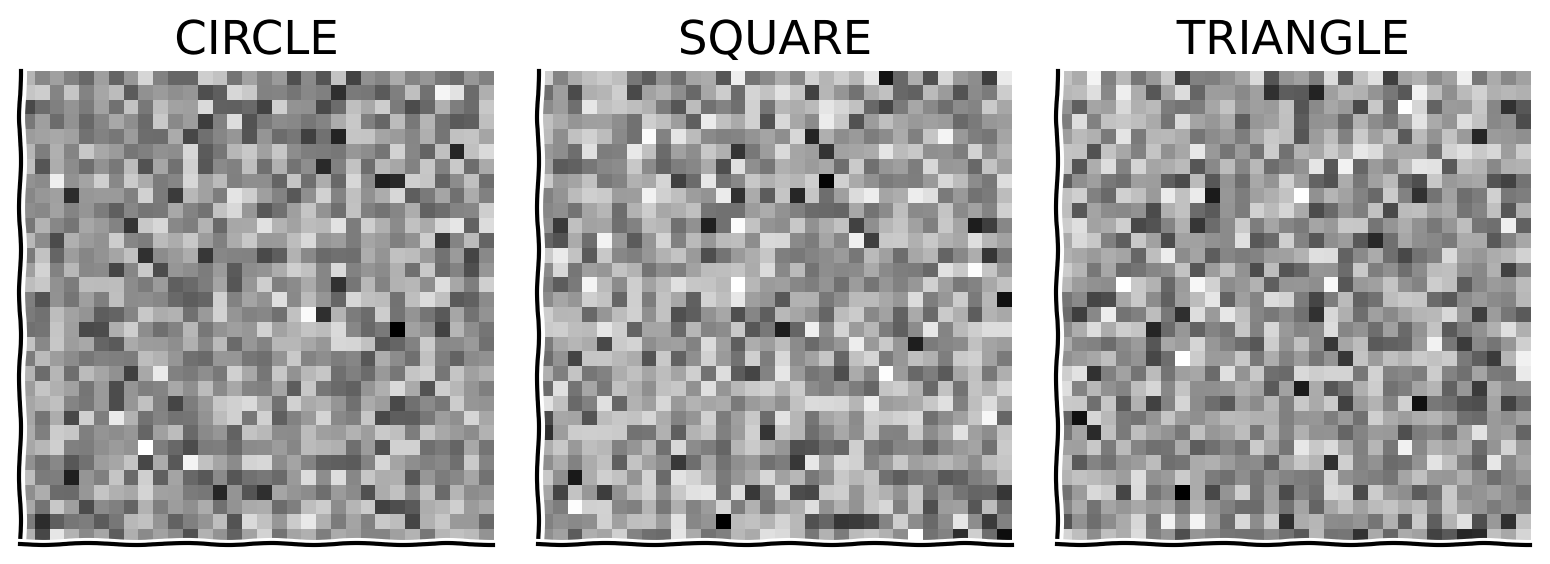

In [7]:
plot_vectors([circle.v, square.v, triangle.v], symbol_names)

As vectors are initialized randomly, it's perfectly expected that there is no visual connection to how we would represent or expect those concepts to be represented.

One of the extremely useful properties of random high-dimensional vectors is that they are approximately orthogonal. This is an important aspect for vector symbolic algebras (VSAs), since we will use the vector dot product to measure similarity between objects encoded as random, high-dimensional vectors.

Discrete objects are either the same or different, so we expect similarity would be either 1 (the same) or 0 (not the same). Given how we select the vectors that represent discrete symbols, if they are the same they will have the dot product of 1 and if they are different concepts, then they will have a dot product of (approximately) 0. This is due to the approximate orthogonality of randomly selected high-dimensional vectors.

Below we use the | operator to indicate similarity. This is borrowed from the bra-ket notation in physics, i.e.,

$$
\mathbf{a}\cdot\mathbf{b} = \langle \mathbf{a} \mid \mathbf{b}\rangle
$$

Notice that this operator **| is** the **dot product** under the hood.

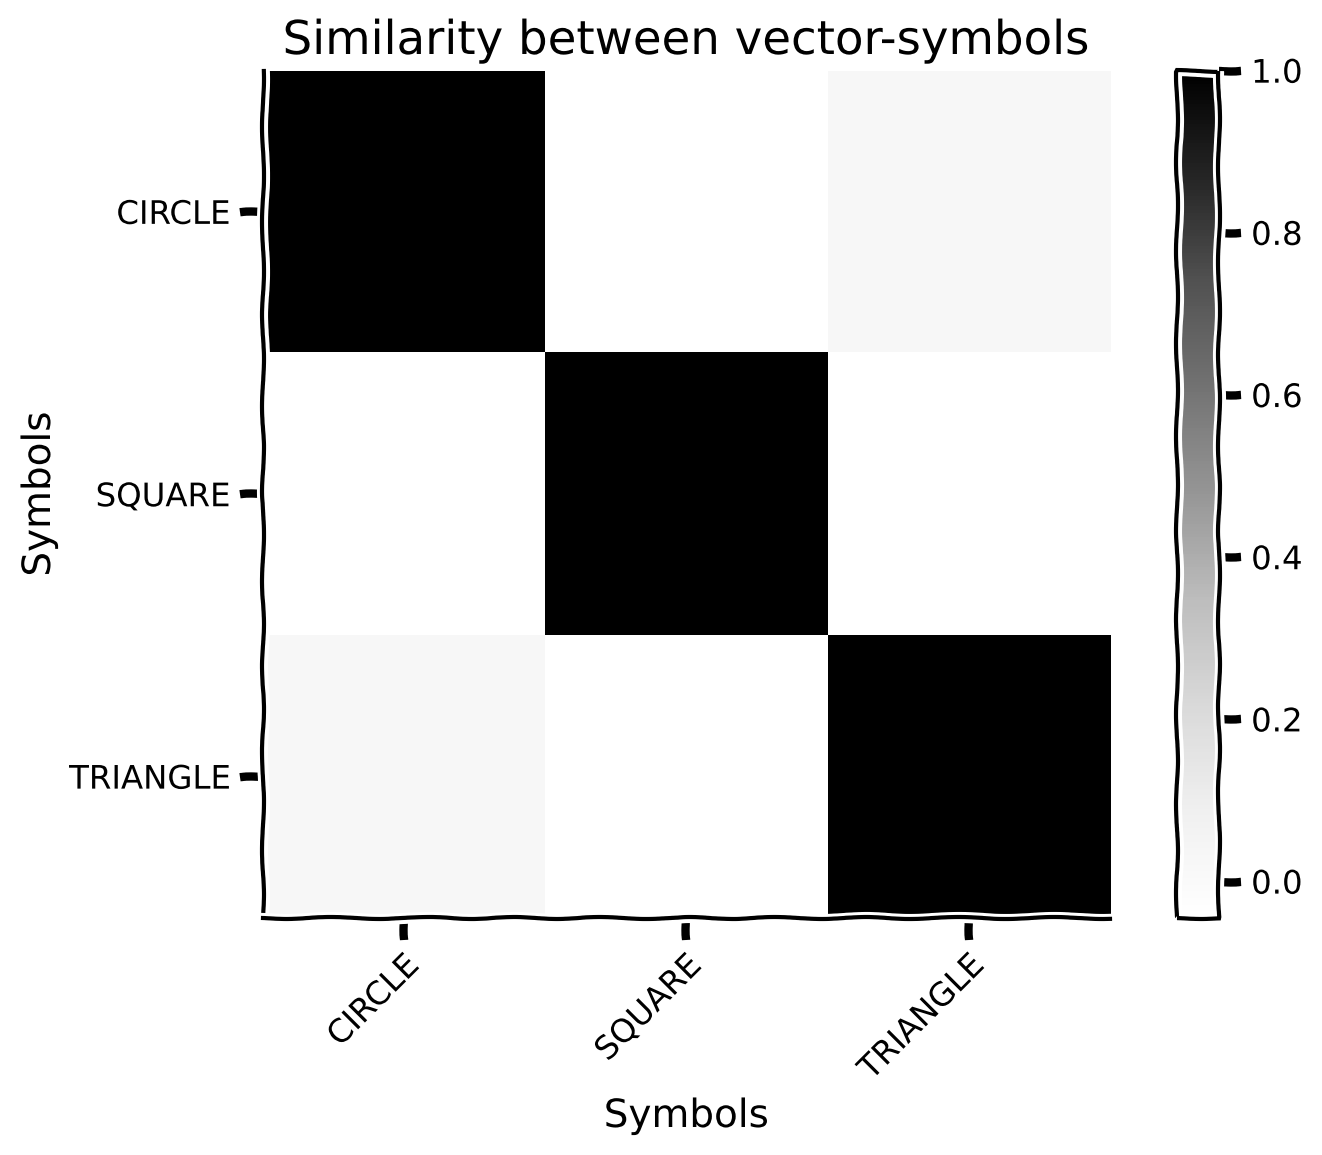

In [8]:
sim_mat = np.zeros((3,3))

sim_mat[0,0] = spa.dot(circle, circle)
sim_mat[1,1] = spa.dot(square, square)
sim_mat[2,2] = spa.dot(triangle, triangle)

sim_mat[0,1] = sim_mat[1,0] = spa.dot(circle, square)
sim_mat[0,2] = sim_mat[2,0] = spa.dot(circle, triangle)
sim_mat[1,2] = sim_mat[2,1] = spa.dot(square, triangle)

plot_similarity_matrix(sim_mat, symbol_names)

As you can see from the above figure, the three randomly selected vectors are approximately orthogonal. This will be important later when we go to make more complicated objects from our vectors.

### Coding Exercise 1 Discussion

1. How would you provide intuitive reasoning (or rigorous mathematical proof) behind the fact that random high-dimensional vectors (note that each of the components is drawn from uniform distribution with zero mean) approximately orthogonal?

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_3e9c4916.py)



In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_concepts_as_high_dimensional_vectors")

---

# Section 2: Bundling

Estimated timing to here from start of tutorial: 10 minutes

In this section, we are going to explore the bundling operation, which allows us to construct vectors that represent something like sets. Basically, we combine two vectors into a new one that retains similarity to the previous two. We implement bundling using vector addition.

In [ ]:
# @title Video 2: Bundling

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'MzOjyvWTdmI'), ('Bilibili', 'BV1LS411P7pf')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_bundling")

## Coding Exercise 2: A Composite Object - Shape

Let's start with our previous example of different shapes (circle, square, and triangle) and use them to create a new object, 'shape,' which will represent all the atomic concepts we've introduced.

In [9]:
shape = (circle + square + triangle).normalized()

Notice that we need to normalize the obtained vector. Now, let us calculate the similarity matrix for the three default concepts and the new one.

In the exercise below, complete the similarity matrix calculation.

In [10]:
###################################################################
## Fill out the following then remove
# raise NotImplementedError("Student exercise: complete calcualtion of similarity matrix.")
###################################################################

sim_mat = np.zeros((4,4))

sim_mat[0,0] = spa.dot(circle, circle)
sim_mat[1,1] = spa.dot(square, square)
sim_mat[2,2] = spa.dot(triangle, triangle)
sim_mat[3,3] = spa.dot(shape, shape)

sim_mat[0,1] = sim_mat[1,0] = spa.dot(circle, square)
sim_mat[0,2] = sim_mat[2,0] = spa.dot(circle, triangle)
sim_mat[0,3] = sim_mat[3,0] = spa.dot(circle, shape)

sim_mat[1,2] = sim_mat[2,1] = spa.dot(square, triangle)
sim_mat[1,3] = sim_mat[3,1] = spa.dot(square, shape)
sim_mat[2,3] = sim_mat[3,2] = spa.dot(triangle, shape)

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_15f690ab.py)



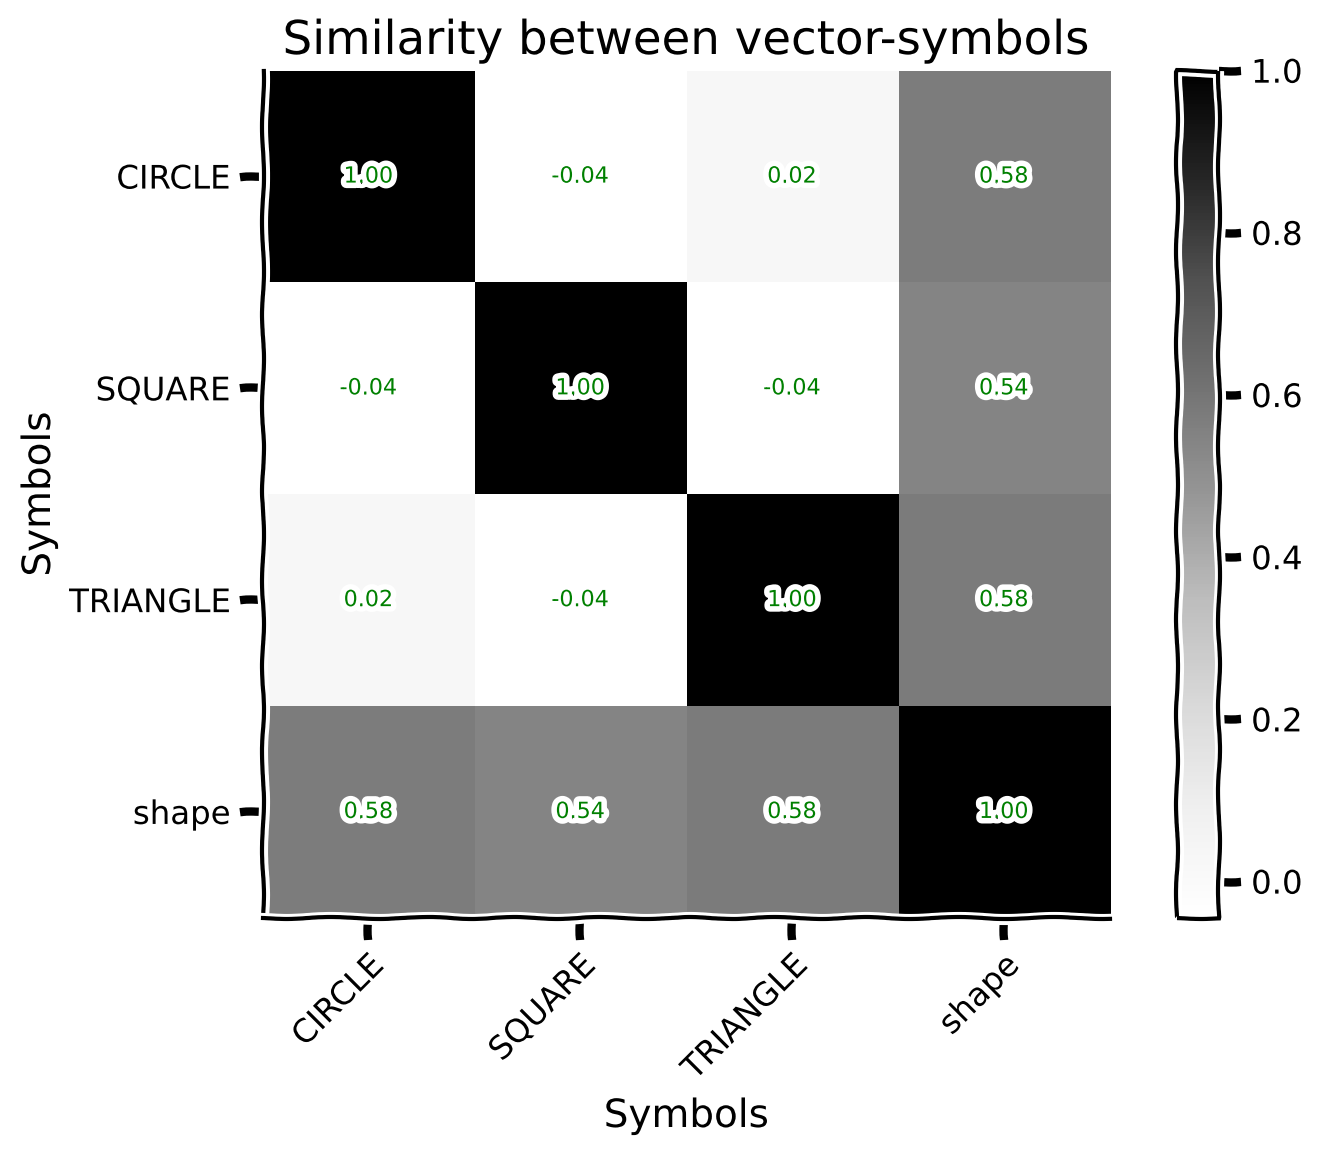

In [11]:
plot_similarity_matrix(sim_mat, symbol_names + ["shape"], values = True)

Observe that as each of the basic concepts was included equally in the definition of the 'shape' symbol, it has the same similarity between all other vectors, pairwise.

### Coding Exercise 2 Discussion

1. Why do we need to normalize the vector obtained as a result of the bundling operation? What length do you expect to receive without normalization?

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_b9294b66.py)



In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_composite_object_shape")

---

# Section 3: Binding & Unbinding

Estimated timing to here from start of tutorial: 20 minutes

In this section we will talk about binding - an operation that takes two vectors and produces a new vector that is *not* similar to either of it's constituent elements.

Binding and unbinding are implemented using circular convolution.  Luckily, that is implemented for you inside the SSPSpace library. If you would like a refresher on convolution, this [Three Blue One Brown video](https://www.youtube.com/watch?v=KuXjwB4LzSA) is a good place to start.

In [ ]:
# @title Video 3: Binding

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'pSWjd3EcrXI'), ('Bilibili', 'BV19n4y197jt')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_binding")

## Coding Exercise 3: Colorful Shapes

We can think of binding as an "and"-like operation. Both arguments need to be the same to produce a similar vector. In this example, let's think about colors and shapes:

In [12]:
set_seed(42)

symbol_names = ['CIRCLE','SQUARE','TRIANGLE', 'RED', 'BLUE', 'GREEN']
vocab = make_vocabulary(vector_length)
vocab.populate(';'.join(symbol_names))

Now we are going to take two of the objects to make new ones: a red circle, a blue triangle and a green square.

We will combine the two primitive objects using the binding operation, which for us is implemented using circular convolution, and we denote it by
$$
 a \circledast b
$$

In the cell below, complete the missing concepts and then observe the computed similarity matrix.

In [13]:
###################################################################
## Fill out the following then remove
# raise NotImplementedError("Student exercise: complete derivation of new objects using binding operation.")
###################################################################

vocab.add('RED_CIRCLE', vocab['RED'] * vocab['CIRCLE'])
vocab.add('BLUE_TRIANGLE', vocab['BLUE'] * vocab['TRIANGLE'])
vocab.add('GREEN_SQUARE', vocab['GREEN'] * vocab['SQUARE'])

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_da1926e8.py)



Notice how we iterate through all objects in `object_names` and calculate pairwise dot products (similarity metric).

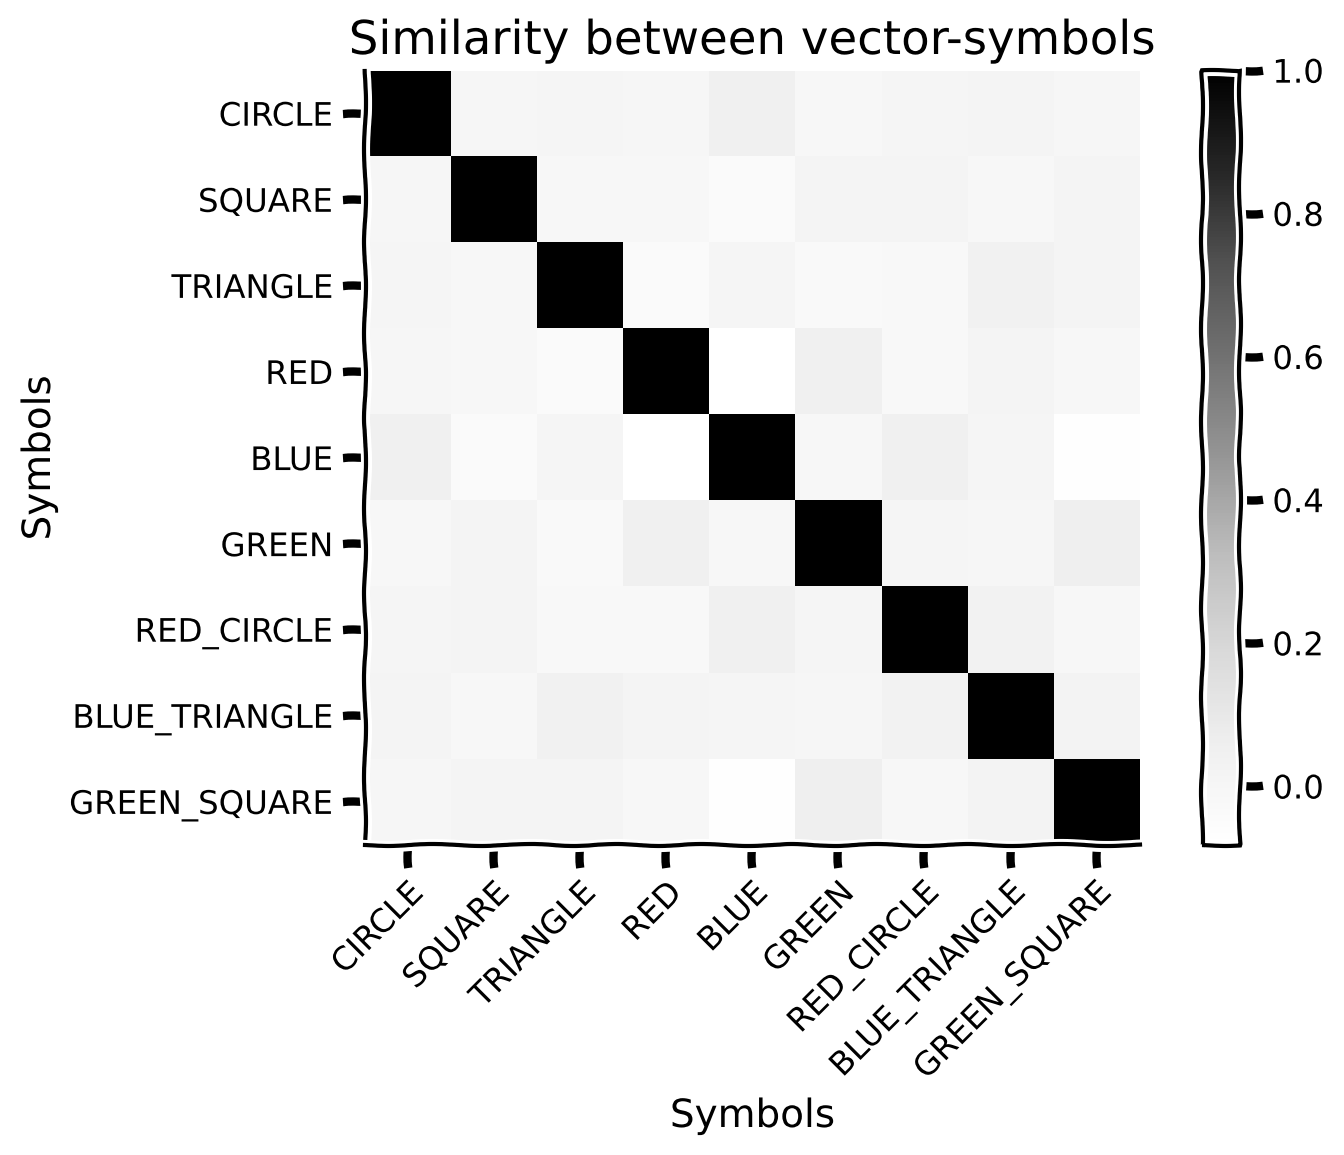

In [14]:
object_names = list(vocab.keys())
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = spa.dot(vocab[name], vocab[object_names[other_idx]])

plot_similarity_matrix(sims, object_names)

As you can see here, not only do the shapes and colors have no similarity, but the compound objects also have no similarity with either of their constituent elements - `green * square` is not similar to either `green` or `square.`

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_colorful_shapes")

## Coding Exercise 4: Foundations of Colorful Shapes

We can also undo the binding operation, which we call unbinding. It is implemented by binding with the pseduo-inverse of the vector we wish to unbind. We denote the pseudoinverse of the vector using the ~ symbol.

The SSPSpace library implements the pseudo-inverse for you, but the pseudo-inverse of a vector $\mathbf{x} = (x_{1},\ldots, x_{d})$ is defined:

$$\sim\mathbf{x} = \left(x_{1},x_{d},x_{d-1},\ldots,x_{2}\right)$$


Consider the example of our red circle. If we wanted to recover the shape of the object, we will unbind from it the color:

$$
(\mathtt{red} \circledast \mathtt{circle}) \circledast \sim \mathtt{red} \approx \mathtt{circle}
$$

In the cell below unbind color and shape, and then observe the similarity matrix.

In [15]:
object_names = ['RED','EST_RED','RED_CIRCLE','CIRCLE','EST_CIRCLE']

###################################################################
## Fill out the following then remove
# raise NotImplementedError("Student exercise: complete derivation of default objects using pseudoinverse.")
###################################################################

# to_remove solution
object_names = ['RED','EST_RED','RED_CIRCLE','CIRCLE','EST_CIRCLE']

vocab.add('EST_RED', (~vocab['CIRCLE'] * vocab['RED_CIRCLE']).normalized())
vocab.add('EST_CIRCLE', (vocab['RED_CIRCLE'] * ~vocab['RED']).normalized())

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_db547f5d.py)



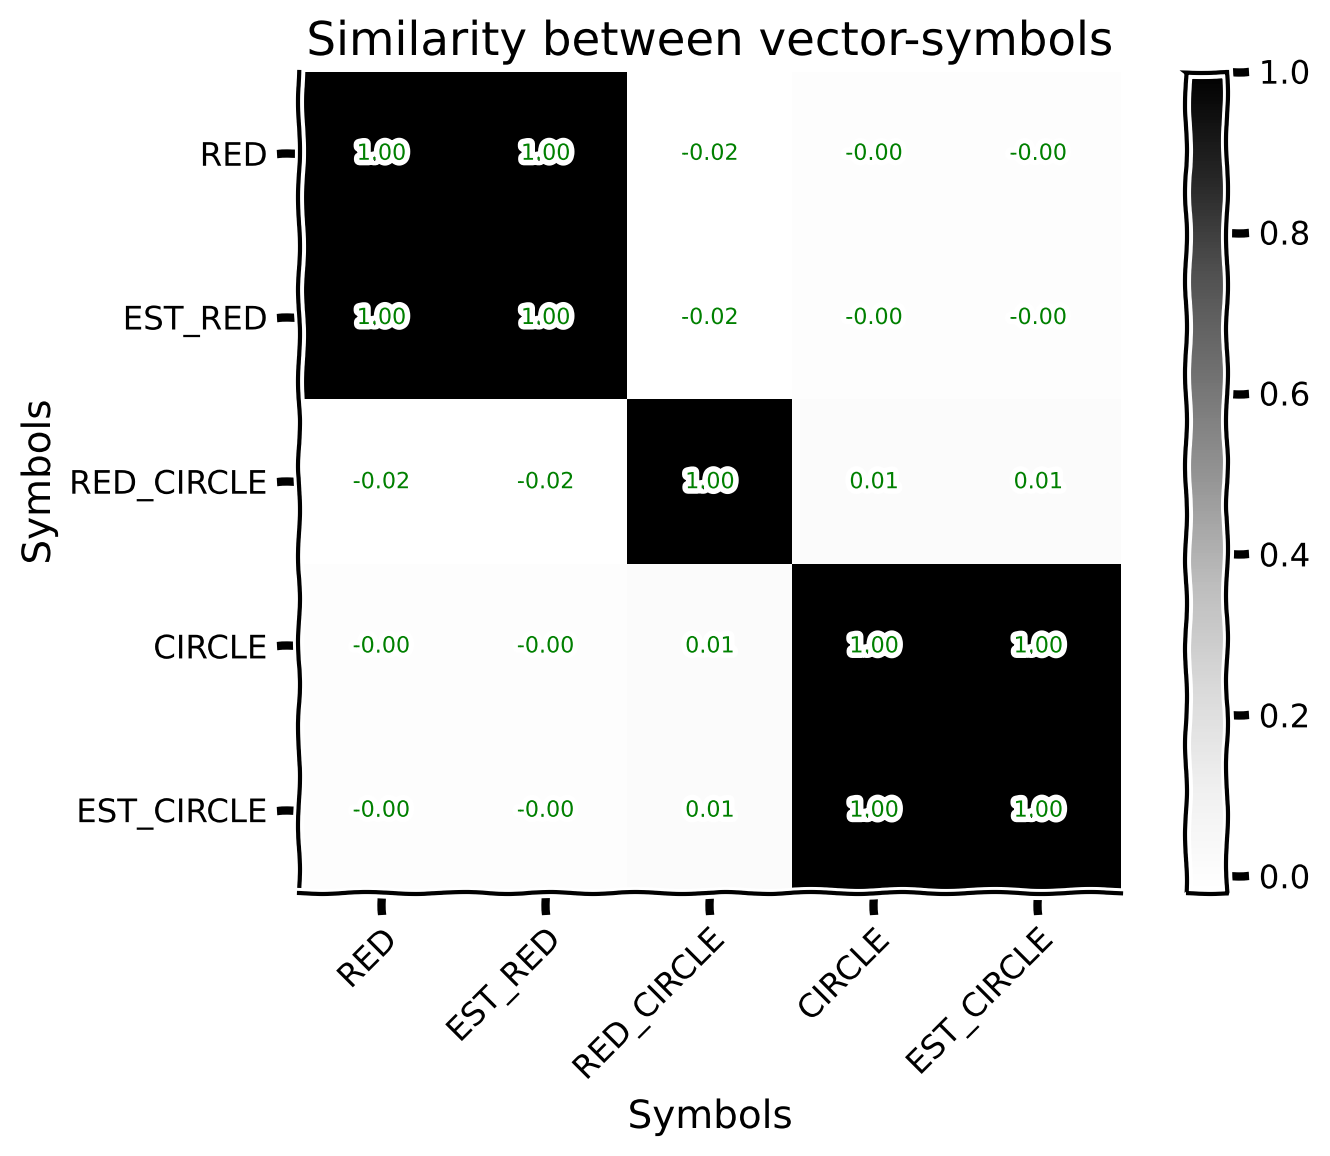

In [16]:
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = spa.dot(vocab[name], vocab[object_names[other_idx]])
        sims[other_idx, name_idx] = sims[name_idx, other_idx]

plot_similarity_matrix(sims, object_names, values = True)

Looking at the above graph, we can see that the compound red circle object is not similar to either of the elements, but the circle and the unbound circle are similar to one another, and the red and unbound red objects are similar to one another.

With these elements together, we have constructed the basic tools we need to construct complex objects in vector symbolic algebra.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_foundations_of_colorful_shapes")

---

# Section 4: Cleanup

Estimated timing to here from start of tutorial: 30 minutes

In this section we will address the issue of vectors being corrupted with noise.

In [ ]:
# @title Video 4: Cleanup

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'eAdDocNOmSc'), ('Bilibili', 'BV1Jy411z7L6')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_cleanup")

## Coding Exercise 5: Cleanup Memories To Find The Best-Fit

In the process of computing with VSAs, the vectors themselves can become corrupted, due to noise, because we implement these systems with spiking neurons, or due to the approximations like using the pseudo inverse for unbinding, or because noise gets added when we operate on complex structures.

To address this problem we employ "cleanup memories".  There are lots of ways to implement these systems, but today we're going to do it with a single hidden layer neural network.  Lets start with a sequence of symbols, say $\texttt{fire-fighter},\texttt{math-teacher},\texttt{sales-manager},$ and so on, in that fashion, and create a new vector that is a corrupted combination of all three.  We will then use a clean up memory to find the best fitting vector in our vocabulary.

In the cell below you will see the definition of `noisy_vector`, your task is to complete the calculation of similarity values for this vector and all default ones.


In [20]:
###################################################################
## Fill out the following then remove
# raise NotImplementedError("Student exercise: complete similarities calculation between noisy vector and given symbols.")
###################################################################

set_seed(42)

symbol_names = ['fire-fighter','math-teacher','sales-manager']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=1024, optimize=False)

vocab = {n:discrete_space.encode(n) for n in symbol_names}

noisy_vector = 0.2 * vocab['fire-fighter'] + 0.15 * vocab['math-teacher'] + 0.3 * vocab['sales-manager']

sims = np.array([noisy_vector | vocab[name] for name in symbol_names]).squeeze()

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_0b0b7a2d.py)



Now let's construct a simple neural network that does cleanup.  We will construct the network, instead of learning it.  The input weights will be the vectors in the vocabulary, and we will place a softmax function on the hidden layer (although we can use more biologically plausible activiations) and the output weights will again be the vectors representing the symbols in the vocabulary.

For efficient implementation of similarity calculation inside network, we will use `np.einsum()` function. Typically, it is used as `output = np.einsum('dim_inp1, dim_inp2 -> dim_out', input1, input2)`

In this notation, `nd,md->nm` is the einsum "equation" or "subscript notation" which describes what operation should be performed. In this particular case, it states that the first input tensor is of shape `(n, d)` while the second is of shape `(m, d)` and the result of operation is of shape `(n, m)` (note that `n` and `m` can coincide). The operation itself performs the following calcualtion: `output[n, m] = sum(input1[n, d] * input2[m, d])`, meaning that in our case it will calculate all pairwise dot products - exactly what we need for similarity!

Your task is to complete `__call__` function. Then we calculate similarity between obtained vector and the ones in the vocabulary.

In [21]:
###################################################################
## Fill out the following then remove
# raise NotImplementedError("Student exercise: complete Cleanup class.")
###################################################################

set_seed(42)

class Cleanup:
    def __init__(self, vocab, temperature=1e5):
        self.weights = np.array([vocab[k] for k in vocab.keys()]).squeeze()
        self.temp = temperature
    def __call__(self, x):
        sims = np.einsum('nd,md->nm',self.weights,x)
        max_sim = softmax(sims * self.temp, axis=0)
        return sspspace.SSP(np.einsum('nd,nm->md', self.weights, max_sim))


cleanup = Cleanup(vocab)

clean_vector = cleanup(noisy_vector)

clean_sims = np.array([clean_vector | vocab[name] for name in symbol_names]).squeeze()

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_f12d9c75.py)



Observe the result with comparison to the pre cleanup metrics.

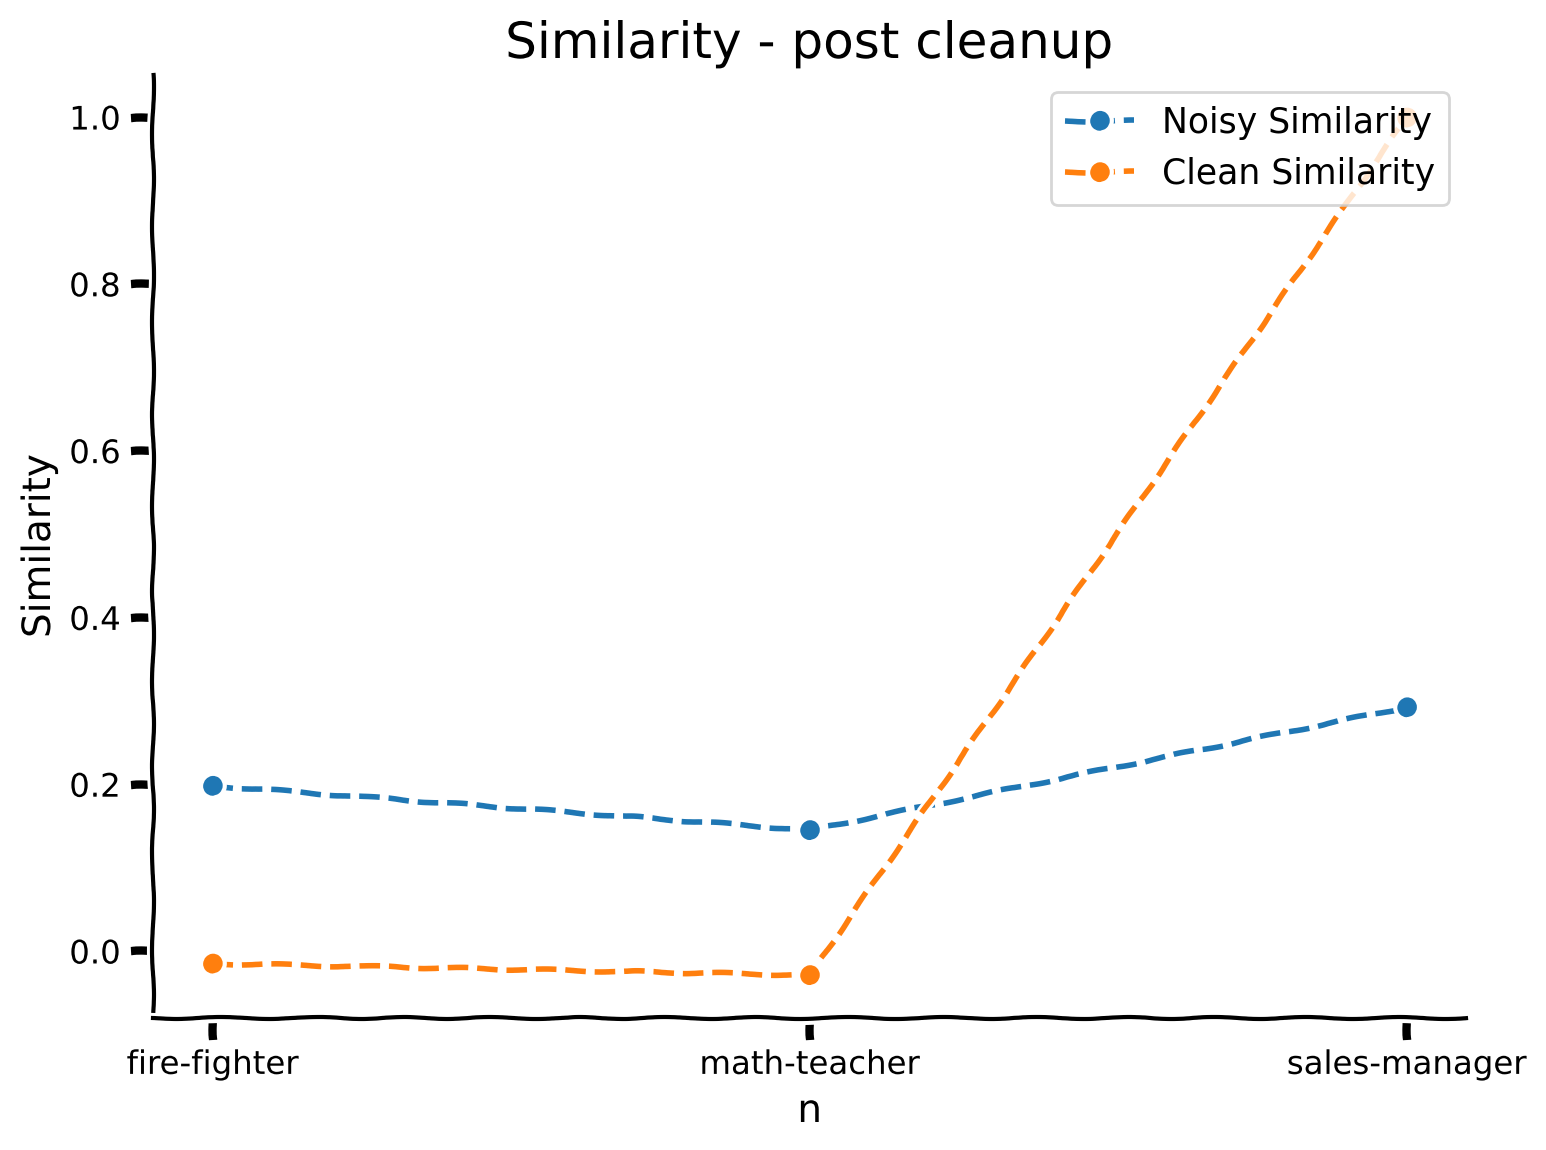

In [22]:
plot_double_line_similarity_matrix([sims, clean_sims], symbol_names, ['Noisy Similarity', 'Clean Similarity'], title = 'Similarity - post cleanup')

We can do this cleanup with a single, feed-forward network, and we don't need to learn any of the synaptic weights if we know what the appropriate vocabulary is.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_cleanup_memories_to_find_the_best_fit")

# Section 5: Iterated Binding

Estimated timing to here from start of tutorial: 45 minutes

In this section, we will represent numbers with iterated binding.

In [ ]:
# @title Video 5: Iterated Binding

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'jUUkxnVHGnY'), ('Bilibili', 'BV1Qs421u7jj')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_iterated_binding")

## Coding Exercise 6: Representing Numbers

It is often useful to be able to represent numbers.  For example, we may want to represent the position of an object in a list, or we may want to represent the coordinates of an object in a grid.  To do this we use the binding operator to construct a vector that represents a number.  We start by picking what we refer to as an "axis vector", let's call it $\texttt{one}$, and then iteratively apply binding, like this:

$$
\texttt{two} = \texttt{one}\circledast\texttt{one}
$$
$$
\texttt{three} = \texttt{two}\circledast\texttt{one} = \texttt{one}\circledast\texttt{one}\circledast\texttt{one}
$$

and so on.  We extend that to arbitrary integers, $n$, by writing:

$$
\phi[n] = \underset{i=1}{\overset{n}{\circledast}}\texttt{one}
$$

Let's try that now and see how similarity between iteratively bound vectors develops. In the cell below you should complete missing part which implements iterative binding mechanism.

In [25]:
###################################################################
## Fill out the following then remove
# raise NotImplementedError("Student exercise: complete iterated binding.")
###################################################################

set_seed(42)

#define axis vector
axis_vectors = ['ONE']
#vocabulary
vocab = make_vocabulary(vector_length)
# vocab = spa.Vocabulary(vector_length)
vocab.populate(';'.join(axis_vectors))

#we will add new vectors to this list
integers = [vocab['ONE']]

max_int = 5
for i in range(2, max_int + 1):
    #bind one more "one" to the previous integer to get the new one
    integers.append((integers[-1] * vocab['ONE']).normalized())

In [26]:
set_seed(42)

#define axis vector
axis_vectors = ['ONE']
#vocabulary
vocab = make_vocabulary(vector_length)
# vocab = spa.Vocabulary(vector_length)
vocab.populate(';'.join(axis_vectors))

#we will add new vectors to this list
integers = [vocab['ONE']]

max_int = 5
for i in range(2, max_int + 1):
    #bind one more "one" to the previous integer to get the new one
    integers.append((integers[-1] * vocab['ONE']).normalized())

Now, we will observe the similarity metric between the obtained vectors. In order to efficienty implement it, we will use already introduced `np.einsum` function. Notice, that in this particual notation, `sims = integers @ integers.T`

In [27]:
sims = np.zeros((len(integers), len(integers)))
for i_idx, i in enumerate(integers):
    for j_idx, j in enumerate(integers):
        sims[i_idx, j_idx] = spa.dot(i,j)

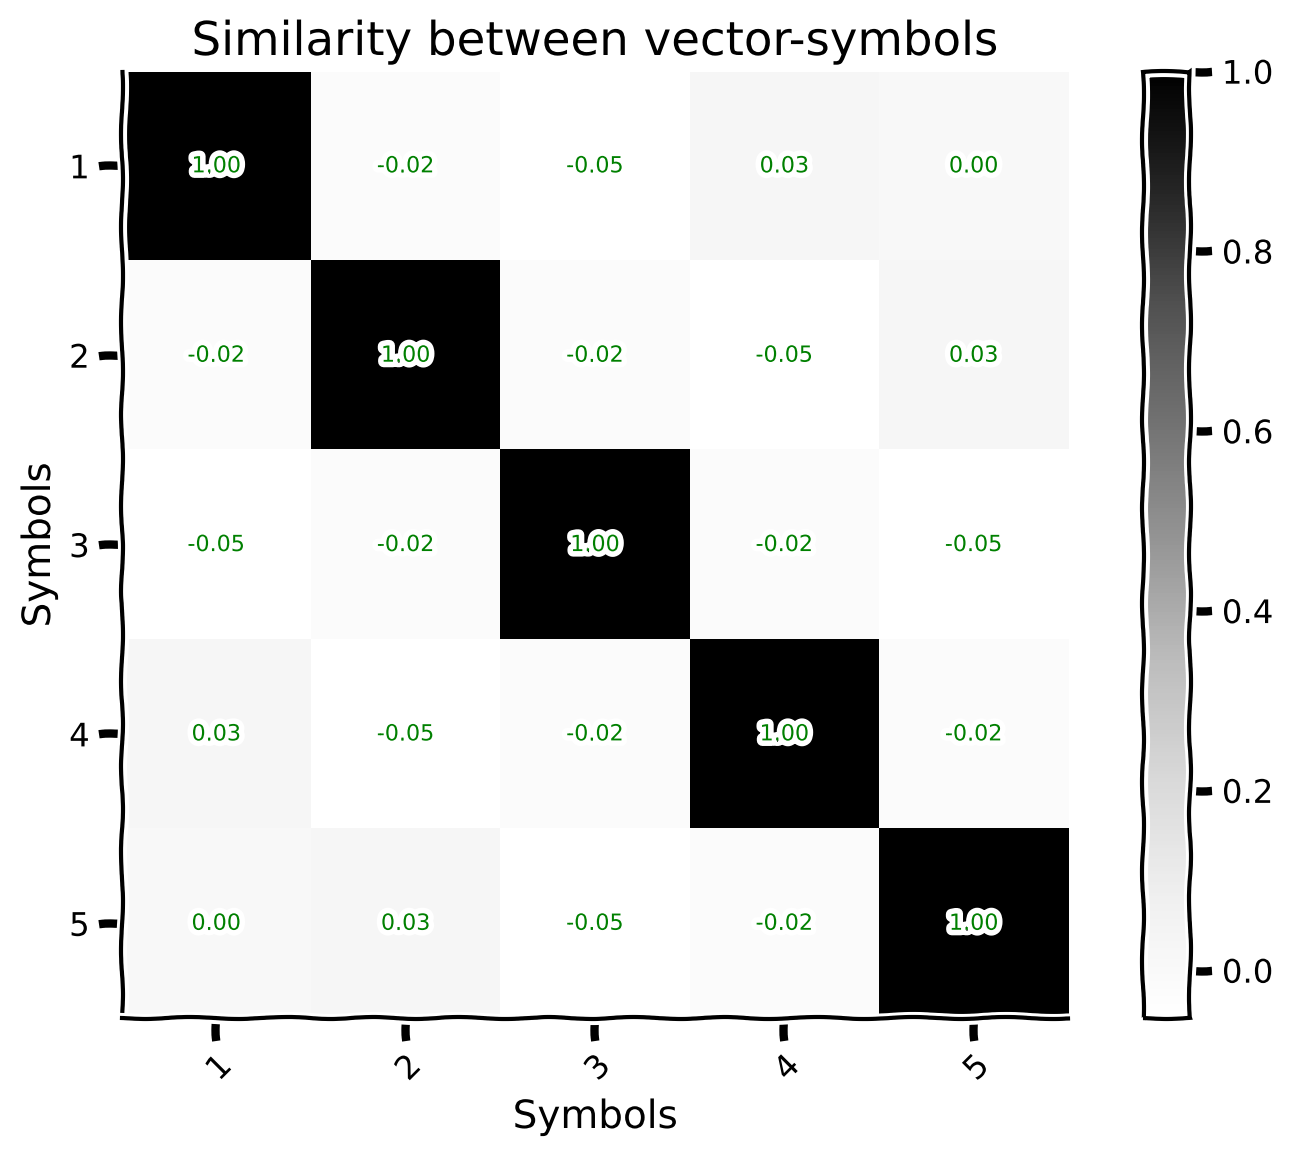

In [28]:
plot_similarity_matrix(sims, [i for i in range(1, 6)], values = True)

Here, we will take a look at another graphical representation of the similarity through lines (the only difference with the previous section is the fact that here, we will have a couple of them, each representing a distinct concept).

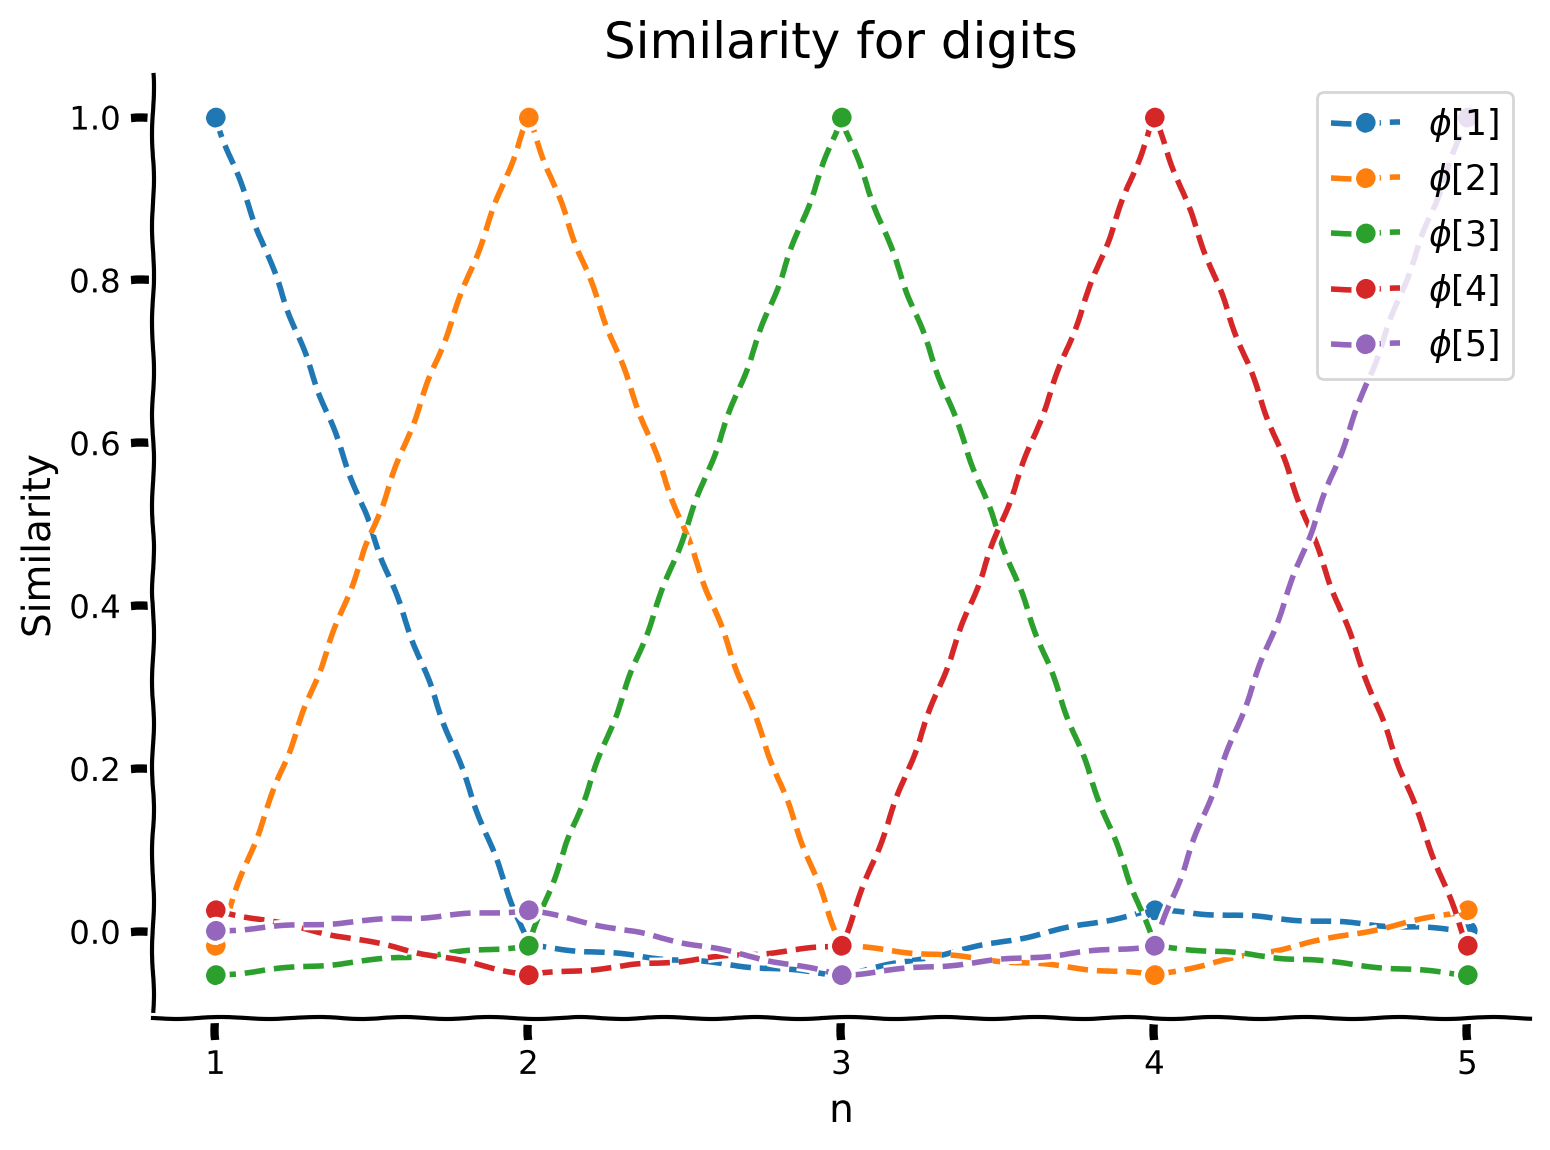

In [29]:
plot_line_similarity_matrix(sims, range(1, 6), multiple_objects = True, labels = [f'$\phi$[{idx+1}]' for idx in range(5)], title = "Similarity for digits")

What we can see here is that each number acts like it's own vector, they are highly dissimilar, but we can still do arithmetic with them.  Let's see what happens when we unbind $\texttt{two}$ from $\texttt{five}$.

In the cell below you are invited to complete the missing parts (be attentive! python is zero-indexed, thus you need to choose correct indices).

In [32]:
###################################################################
## Fill out the following then remove
# raise NotImplementedError("Student exercise: unbinding of two from five.")
###################################################################

five_unbind_two = integers[4] * ~integers[1]
sims = np.array([spa.dot(five_unbind_two, i) for i in integers])

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_513dd01a.py)



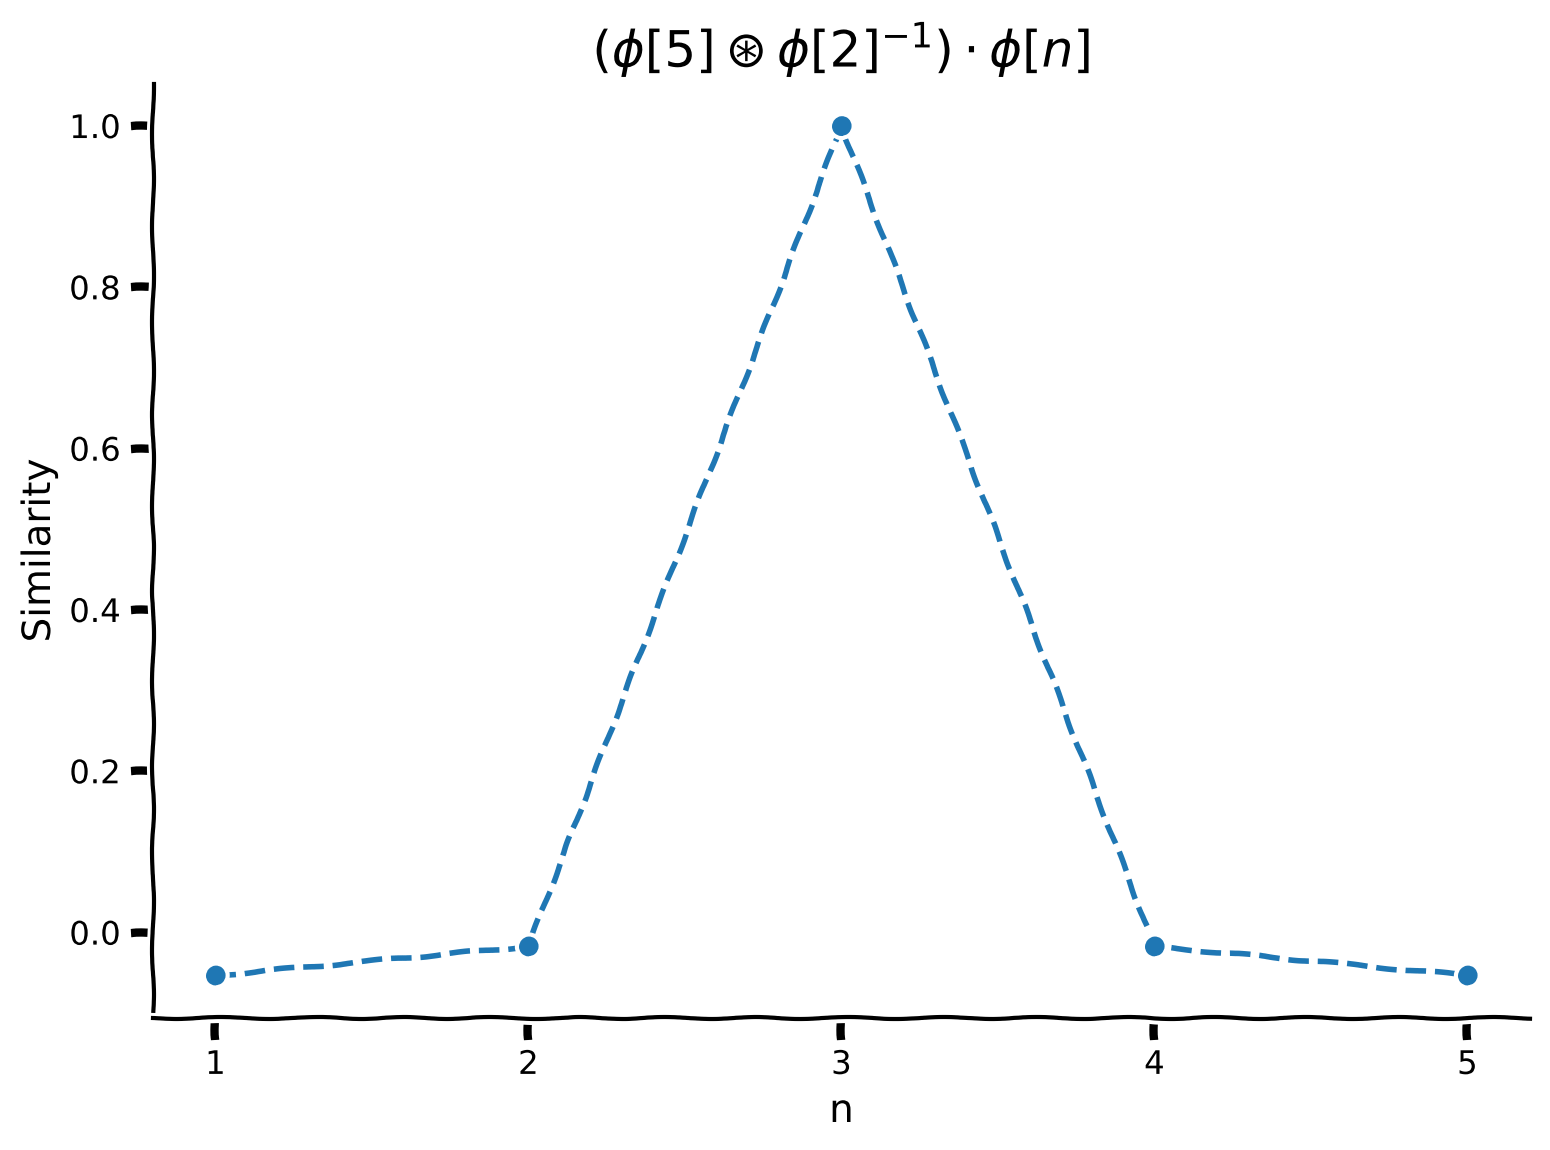

In [33]:
plot_line_similarity_matrix(sims, range(1, 6), multiple_objects = False,  title = '$(\phi[5]\circledast \phi[2]^{-1}) \cdot \phi[n]$')

We get what we expected - when we removed $\texttt{two}$ from $\texttt{five}$ we get a vector that is similar to $\texttt{three}$.  We can do arithmetic with our vector encoding!

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_representing_numbers")

## Background Material
### Coding Exercise 7: Beyond Binding Integers

This is all well and good, but sometimes we want to encode values that are not integers.  Is there an easy way to do this?  You'll be surprised to learn that the answer is: yes.

We actually use the same technique, but we recognize that iterated binding can be implemented in the Fourier domain:

$$
\phi[n] = \mathcal{F}^{-1}\left\{\mathcal{F}\left\{\texttt{one}\right\}^{n}\right\}
$$

where the power of $n$ in the Fourier domain is applied element-wise to the vector.  To encode real-valued data we simply let the integer value, $n$, be a real-valued vector, $x$, and we let the axis vector be a randomly generated vector, $X$.

$$
\phi(x) = \mathcal{F}^{-1}\left\{\mathcal{F}\left\{X\right\}^{x}\right\}
$$

We call vectors that represent real-valued data Spatial Semantic Pointers (SSPs).  We can also extend this to multi-dimensional data by binding different SSPs together.

$$
\phi(x,y) = \phi_{X}(x) \circledast \phi_{Y}(y)
$$


In the $\texttt{sspspace}$ library we provide an encoder for real- and integer-valued data, and we'll demonstrate it next by encoding a bunch of points in the range $[-4,4]$ and comparing their value to $0$, encoded a SSP.

In the cell below you should complete similarity calculation by injecting correct index for $0$ element (observe that it is right in the middle of encoded array).

In [34]:
set_seed(42)
vocab = make_vocabulary(vector_length)
vocab.populate('X')

X = vocab['X'].abs()
xs = np.linspace(-4,4,401)[:,None] #we expect the encoded values to be two-dimensional in `encoder.encode()` so we add extra dimension
phis = [(X**x) for x in xs]

#`0` element is right in the middle of phis array! notice that we have 401 samples inside it
sims = np.array([spa.dot(phis[200], p) for p in phis])

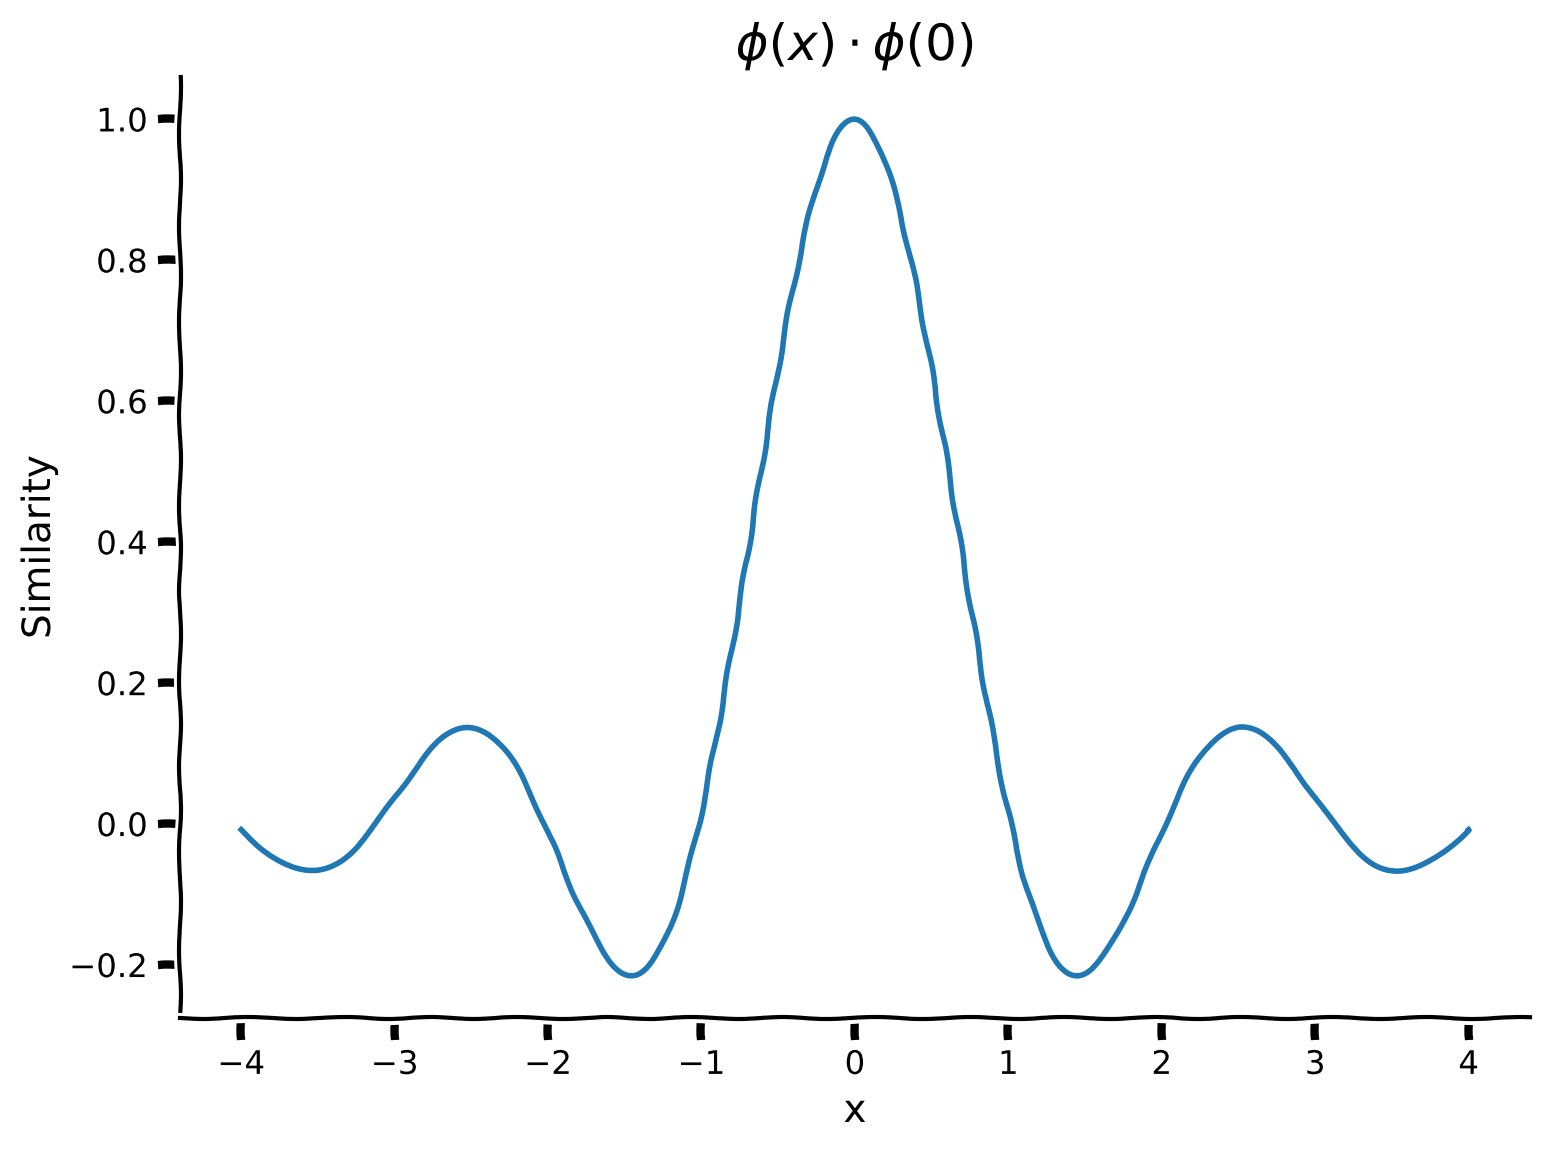

In [35]:
plot_real_valued_line_similarity(sims, xs, title = '$\phi(x)\cdot\phi(0)$')

As with the integers, we can update the values, post-encoding through the binding operation.  Let's look at the similarity between all the points in the range $[-4,4]$ this time with the value $\pi/2$, but we will shift it by binding the origin with the desired shift value.

In the cell below you need to provide the value by which we are going to shift the origin.

In [47]:
###################################################################
## Fill out the following then remove
# raise NotImplementedError("Student exercise: provide value to shift and observe the usage of the operation.")
###################################################################

phi_shifted = phis[200] * X**(np.pi/2)
sims = np.array([spa.dot(p, phi_shifted) for p in phis])

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_ce5fc6c7.py)



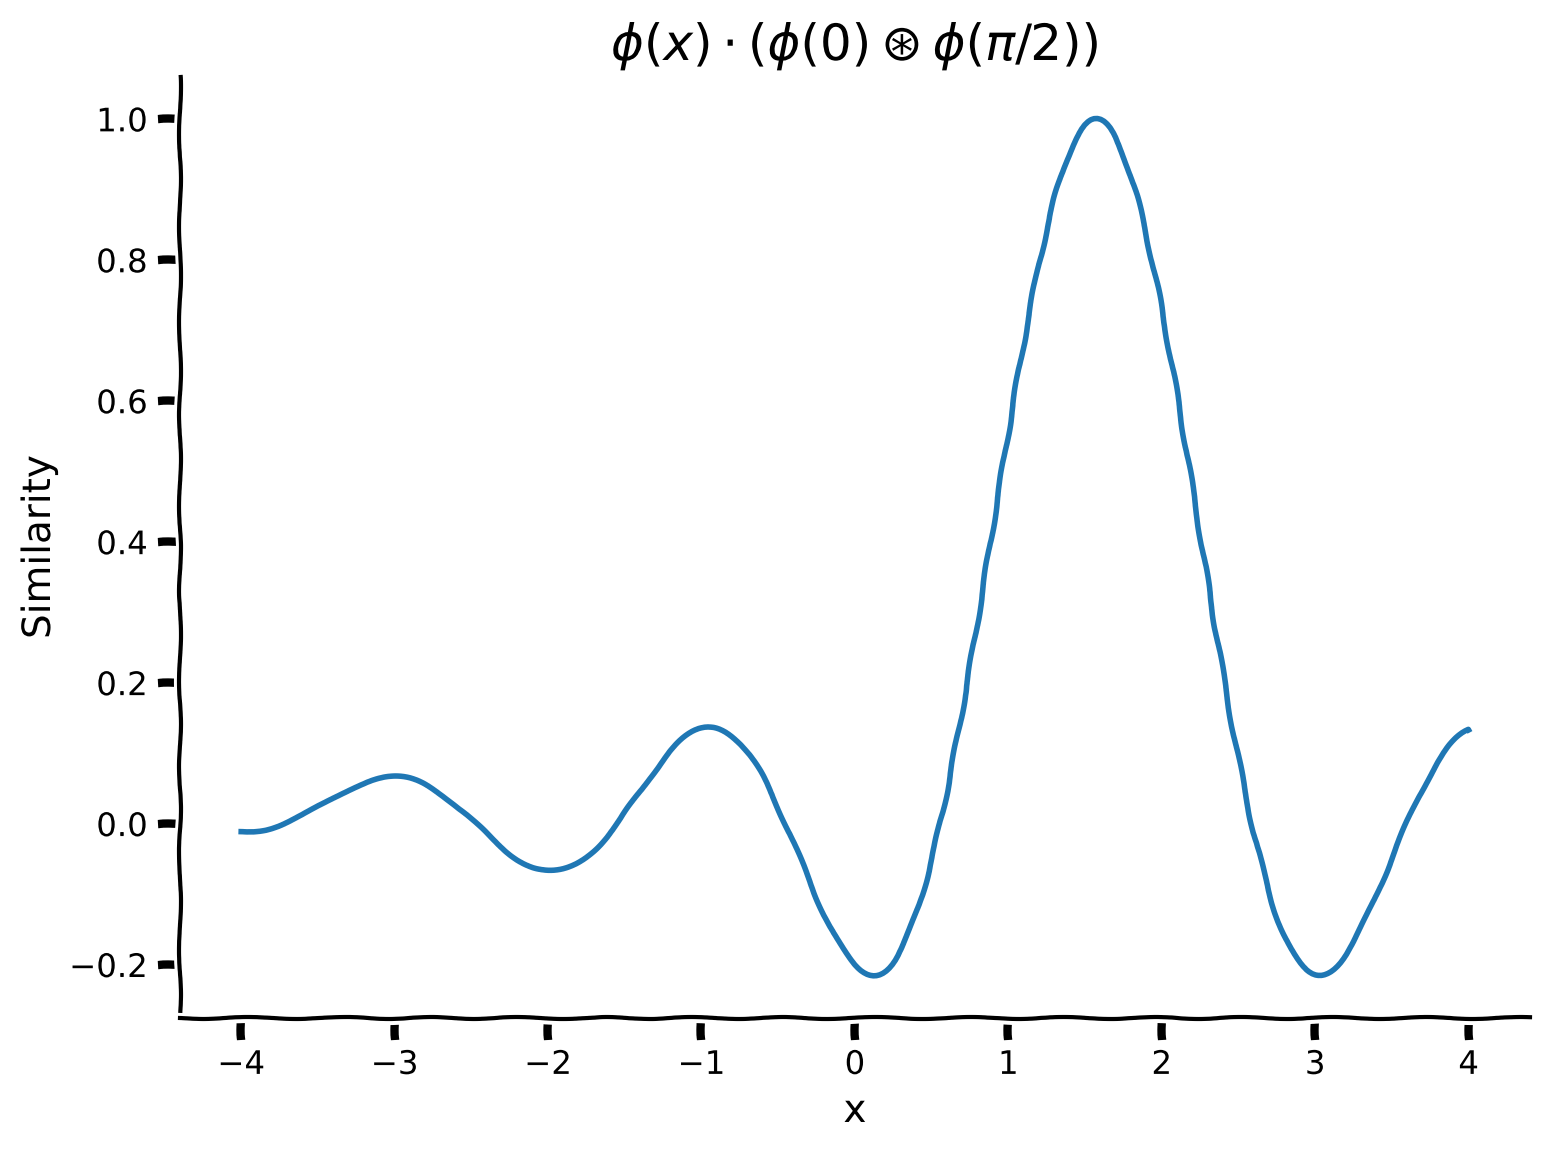

In [48]:
plot_real_valued_line_similarity(sims, xs, title = '$\phi(x)\cdot(\phi(0)\circledast\phi(\pi/2))$')

We can then take that vector and shift it again to a new location.

In [41]:
phi_shifted = phis[200] * X**(-1.5*np.pi)
sims = np.array([spa.dot(phi_shifted, p) for p in phis])

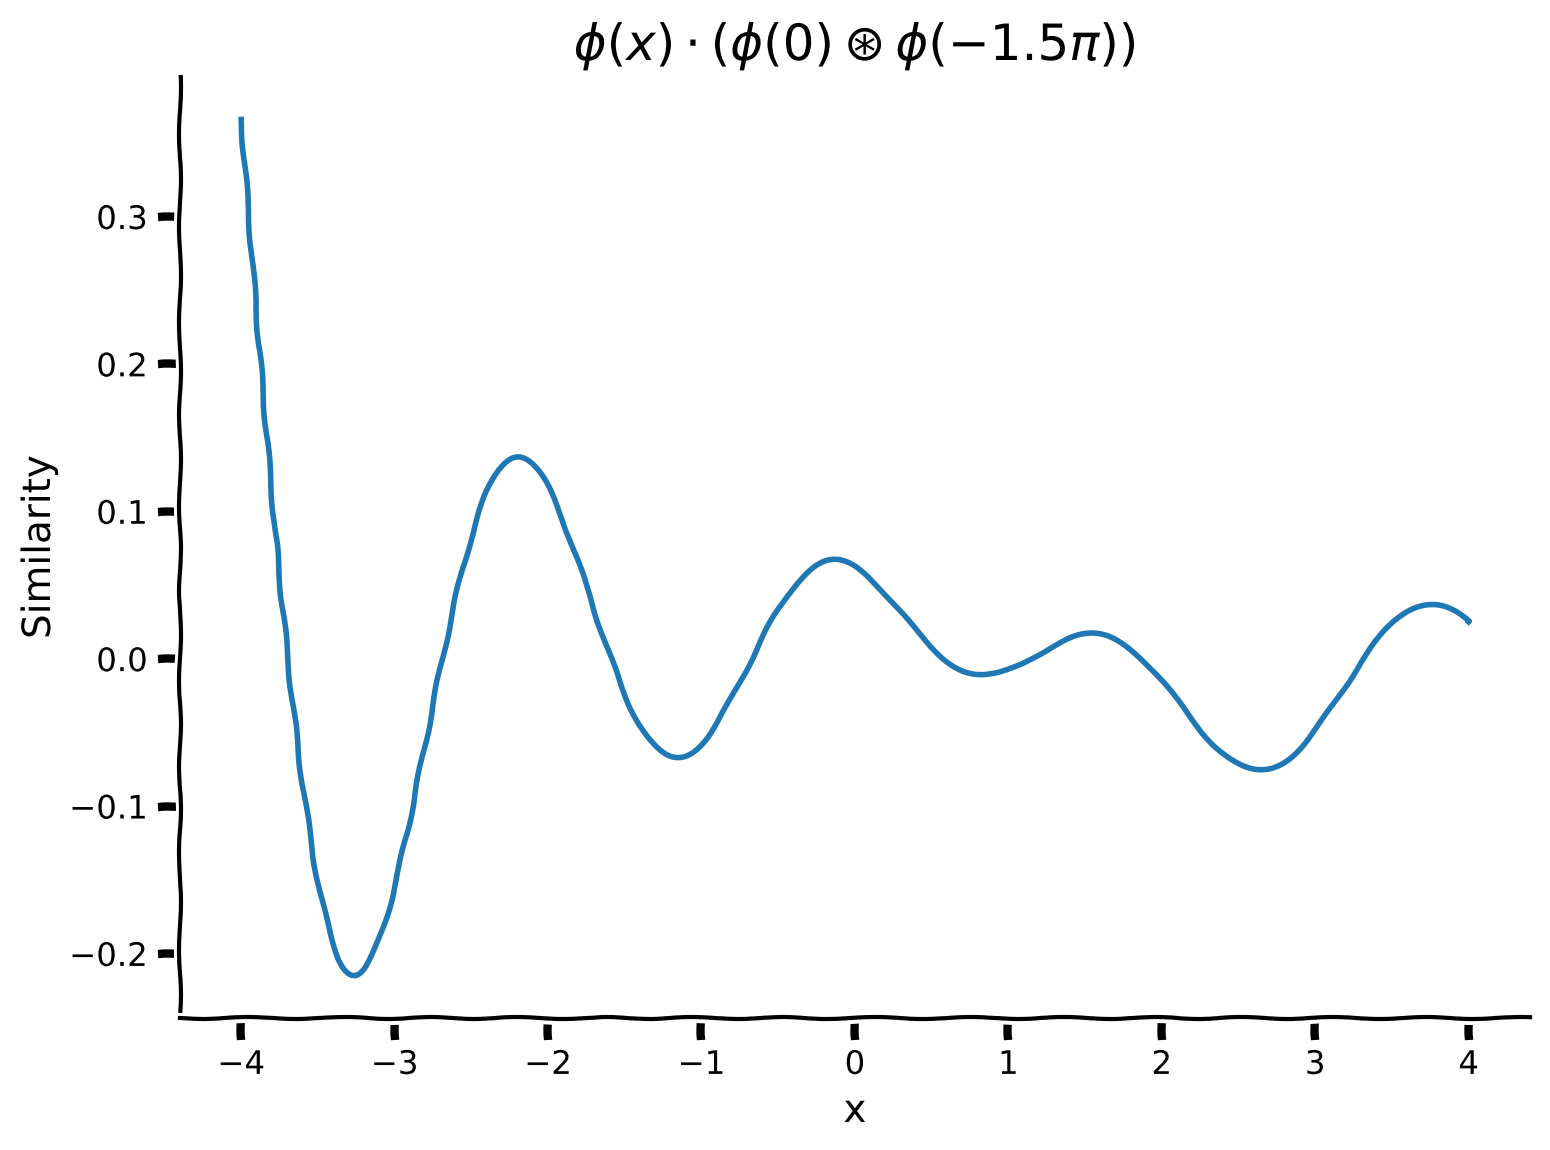

In [42]:
plot_real_valued_line_similarity(sims, xs, title = '$\phi(x)\cdot(\phi(0)\circledast\phi(-1.5\pi))$')

We will go on to use these encodings to build spatial maps in Tutorial 5 (Bonus).

### Coding Exercise 7 Discussion

1. How would you explain the usage of `d,md->m` in `np.einsum()` function in the previous coding exercise?

[*Click for solution*](https://github.com/neuromatch/NeuroAI_Course/tree/main/tutorials/W2D2_NeuroSymbolicMethods/solutions/W2D2_Tutorial1_Solution_b91a4ab5.py)



In [49]:
# @title Video 6: Iterated Binding Conclusion

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

video_ids = [('Youtube', 'zXYODzMw_Vc'), ('Bilibili', 'BV1Wm421L7ax')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_iterated_binding_conclusion")

---
# Summary

*Estimated timing of tutorial: 1 hour*

In this tutorial, we developed the toolbox of the main operations on the vector symbolic algebra. In particular, it includes:
- similarity operation (|), which measures how similar the two vectors are (by calculating their dot product);
- bundling (+), which creates new set-like objects using vector addition;
- binding ($\circledast$), which creates new combined representation of the two given objects using circular convolution;
- unbinding (~), which allows to derive pure object from the binded representation by unbinding another one which stands in the pair;
- cleanup, which tries to identify the most similar vector in the vocabulary, with multiple possible implementations.

In the following tutorials, we will take a look at how we can use these tools to create more complicated structures and derive useful information from them.